### 手写数字识别

In [2]:
# 导入相关工具包
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
data = np.load('./digit.npy')

In [4]:
data.shape

(5000, 28, 28)

In [7]:
index = np.random.randint(0,5000,size = 1)[0]
print(index)

3926


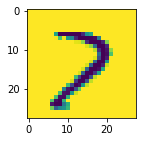

In [15]:
plt.figure(figsize=(2,2))
plt.imshow(data[index])

In [17]:
y = np.array([0,1,2,3,4,5,6,7,8,9]*500)
y = np.sort(y)

In [22]:
data = data.reshape(5000,-1) 
# 由(5000, 28, 28) 5000 个二维图像转换为 5000个一维图像 28 * 28 的像素 展开为一个一维的像素 即(5000,784)

#### 拆分训练数据和测试数据

In [23]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.1) #保留 500个数据作为验证数据
display(X_train.shape,X_test.shape)

(4500, 784)

(500, 784)

#### 算法建模

In [24]:
X_train.ndim

2

In [25]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

#### 算法验证

In [26]:
y_ = knn.predict(X_test)
display(y_test[:20],y_[:20])

array([9, 0, 7, 5, 0, 9, 6, 0, 4, 7, 9, 9, 0, 1, 6, 3, 2, 8, 0, 2])

array([9, 0, 7, 5, 0, 9, 6, 0, 4, 7, 9, 9, 0, 1, 6, 3, 2, 8, 0, 7])

#### 准确率验证

In [27]:
knn.score(X_test,y_test)

0.934

#### 可视化

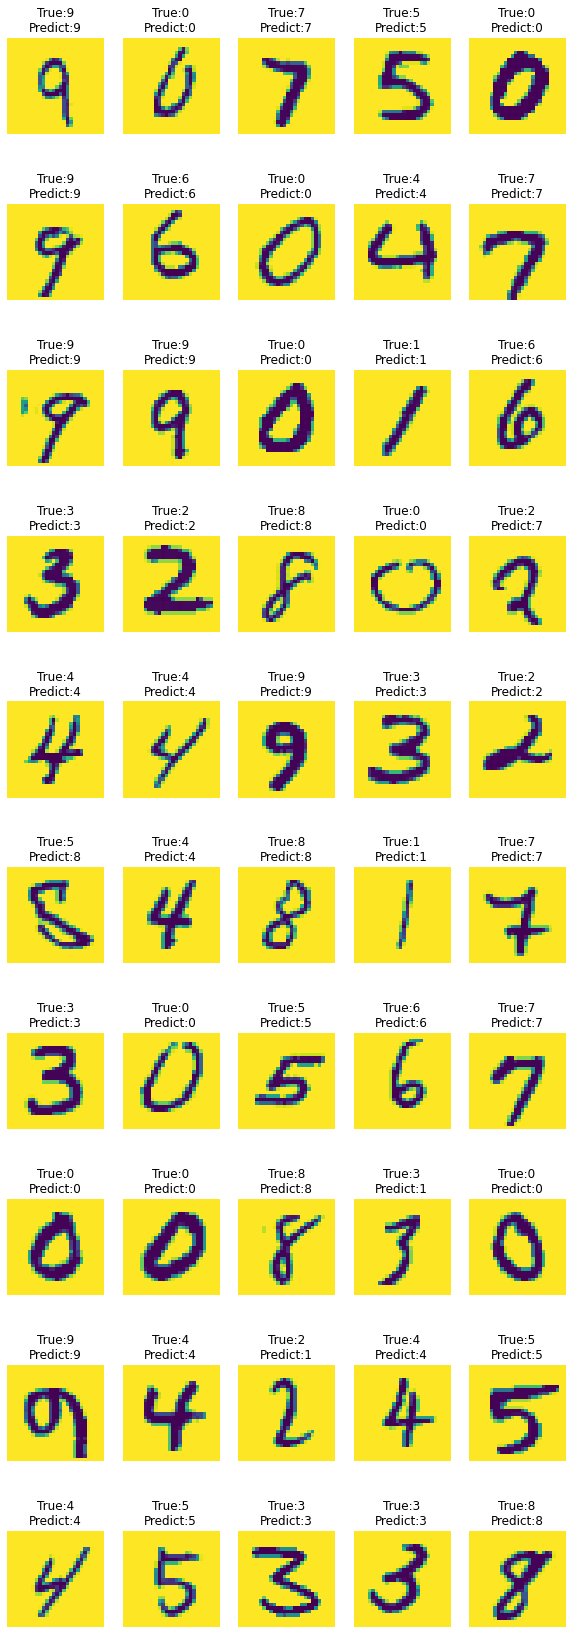

In [28]:
plt.figure(figsize=(2*5,3*10))
# mnist美国一个机构，花钱雇人写的
for i in range(50):
    # 10行5列
    plt.subplot(10,5,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.axis('off')
    plt.title('True:%d\nPredict:%d' % (y_test[i],y_[i]))